In [1]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=870d8c55b3dec8079cc106601ccb2131dc6aa2a29003540a9c07c2227ed015c5
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [2]:
import plotly.express as px
import os
import pandas as pd
import re
import datetime as time
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from collections import Counter
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
import pandas as pd
whatsapp_df = pd.read_fwf('WhatsApp_Chat.txt', header = None)


# drop columns with NaN values
whatsapp_df = whatsapp_df.dropna(axis=1)



print(type(whatsapp_df))
whatsapp_df

<class 'pandas.core.frame.DataFrame'>


,0
0,"30/12/2022, 8:07 pm - Messages and calls are e..."
1,"31/12/2022, 1:00 am - Sarthak Kataria: Happy B..."
2,"31/12/2022, 1:01 am - Aarushii: Happy Birthday..."
3,"31/12/2022, 1:05 am - Tridha Bajaj: Happiest B..."
4,"31/12/2022, 1:21 am - Saloni Sukriti: Happy Bi..."
...,...
3428,NLP Hons. ka attendance issue isme daal do
3429,"24/03/2023, 9:19 am - Aayushman Gussain: Guys ..."
3430,"24/03/2023, 10:39 am - Someshgrng: Chuster hea..."
3431,"24/03/2023, 10:39 am - Tridha Bajaj: T P Singh"


In [4]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3433 non-null   object
dtypes: object(1)
memory usage: 26.9+ KB


In [5]:
whatsapp_df.shape

(3433, 1)

In [7]:
import re
import pandas as pd
import emoji
import regex
from collections import Counter

def txtTodf(txt_file):
    '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
    # some regex to account for messages taking up multiple lines
    pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]
    
    user     = [] 
    messages  = [] 
    datetime = []
    emojis = []
    
   # common_emojis = [e for e in emoji.EMOJI_DATA.keys() if len(e) == 1] # select only commonly used emojis
   # common_emojis = [e for e in emoji.EMOJI_DATA.keys() if emoji.EMOJI_DATA[e]['category'] == 'Smileys & Emotion']
    emoji_list = regex.findall(r'\X', ''.join(emoji.EMOJI_DATA.keys()))
    common_emojis = [e for e in emoji_list if len(e) == 1]

    
    for row in data:

        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])

        # sender is between am/pm, dash and colon
        try:
            s = re.search('m - (.*?):', row).group(1)
            user.append(s)
        except:
            user.append('')

        # message content is after the first colon
        try:
            message = row.split(': ', 1)[1]
            message_emojis = [c for c in message if c in common_emojis]
            message_emojis_counter = dict(Counter(message_emojis))
            messages.append(message)
            emojis.append(message_emojis_counter)
        except:
            messages.append('')
            emojis.append({})

    df = pd.DataFrame(zip(datetime, user, messages, emojis), columns=['datetime', 'user', 'message', 'emojis'])
    df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %I:%M %p')

    # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)


  
    
    return df
whatsapp_df = txtTodf('WhatsApp_Chat.txt')

In [8]:
whatsapp_df.head(10)

,datetime,user,message,emojis
0,2022-12-31 01:00:00,Sarthak Kataria,Happy Birthday @919971150913 🥳🥳🥳,{'🥳': 3}
1,2022-12-31 01:01:00,Aarushii,Happy Birthday @919971150913 🥳🎉🎁,"{'🥳': 1, '🎉': 1, '🎁': 1}"
2,2022-12-31 01:05:00,Tridha Bajaj,Happiest Birthday @919971150913 🎂🎉🎊🥳,"{'🎂': 1, '🎉': 1, '🎊': 1, '🥳': 1}"
3,2022-12-31 01:21:00,Saloni Sukriti,Happy Birthday @919971150913 🎂🥳,"{'🎂': 1, '🥳': 1}"
4,2022-12-31 01:24:00,Aarti,Thanks Kataria 🙂💫,"{'🙂': 1, '💫': 1}"
5,2022-12-31 01:24:00,Aarti,Thanks aarushi ❤️,{'❤': 1}
6,2022-12-31 01:24:00,Aarti,Thanks tridha ❤️,{'❤': 1}
7,2022-12-31 01:24:00,Aarti,Thanks saloni ❤️,{'❤': 1}
8,2022-12-31 02:34:00,Someshgrng,Happy Birthday @919971150913 🥳🥳🥳,{'🥳': 3}
9,2022-12-31 02:50:00,+91 93586 62942,Happy birthday @919971150913 🥳🎂🍰,"{'🥳': 1, '🎂': 1, '🍰': 1}"


In [9]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    stop_words_update = (["aadi" ,"aaj" ,"aap" ,"aapne" ,"aata" ,"aati" ,"aaya" ,"aaye" ,"ab" ,"abbe" ,"abbey" ,"abe" ,"abhi" ,"able" ,"about" ,"above" ,"accha" ,"according" ,"accordingly" ,"acha" ,"achcha" ,"across" ,"actually" ,"after" ,"afterwards" ,"again" ,"against" ,"agar" ,"ain" ,"aint" ,"ain't" ,"aisa" ,"aise" ,"aisi" ,"alag" ,"all" ,"allow" ,"allows" ,"almost" ,"alone" ,"along" ,"already" ,"also" ,"although" ,"always" ,"am" ,"among" ,"amongst" ,"an" ,"and" ,"andar" ,"another" ,"any" ,"anybody" ,"anyhow" ,"anyone" ,"anything" ,"anyway" ,"anyways" ,"anywhere" ,"ap" ,"apan" ,"apart" ,"apna" ,"apnaa" ,"apne" ,"apni" ,"appear" ,"are" ,"aren" ,"arent" ,"aren't" ,"around" ,"arre" ,"as" ,"aside" ,"ask" ,"asking" ,"at" ,"aur" ,"avum" ,"aya" ,"aye" ,"baad" ,"baar" ,"bad" ,"bahut" ,"bana" ,"banae" ,"banai" ,"banao" ,"banaya" ,"banaye" ,"banayi" ,"banda" ,"bande" ,"bandi" ,"bane" ,"bani" ,"bas" ,"bata" ,"batao" ,"bc" ,"be" ,"became" ,"because" ,"become" ,"becomes" ,"becoming" ,"been" ,"before" ,"beforehand" ,"behind" ,"being" ,"below" ,"beside" ,"besides" ,"best" ,"better" ,"between" ,"beyond" ,"bhai" ,"bheetar" ,"bhi" ,"bhitar" ,"bht" ,"bilkul" ,"bohot" ,"bol" ,"bola" ,"bole" ,"boli" ,"bolo" ,"bolta" ,"bolte" ,"bolti" ,"both" ,"brief" ,"bro" ,"btw" ,"but" ,"by" ,"came" ,"can" ,"cannot" ,"cant" ,"can't" ,"cause" ,"causes" ,"certain" ,"certainly" ,"chahiye" ,"chaiye" ,"chal" ,"chalega" ,"chhaiye" ,"clearly" ,"c'mon" ,"com" ,"come" ,"comes" ,"could" ,"couldn" ,"couldnt" ,"couldn't" ,"d" ,"de" ,"dede" ,"dega" ,"degi" ,"dekh" ,"dekha" ,"dekhe" ,"dekhi" ,"dekho" ,"denge" ,"dhang" ,"di" ,"did" ,"didn" ,"didnt" ,"didn't" ,"dijiye" ,"diya" ,"diyaa" ,"diye" ,"diyo" ,"do" ,"does" ,"doesn" ,"doesnt" ,"doesn't" ,"doing" ,"done" ,"dono" ,"dont" ,"don't" ,"doosra" ,"doosre" ,"down" ,"downwards" ,"dude" ,"dunga" ,"dungi" ,"during" ,"dusra" ,"dusre" ,"dusri" ,"dvaara" ,"dvara" ,"dwaara" ,"dwara" ,"each" ,"edu" ,"eg" ,"eight" ,"either" ,"ek" ,"else" ,"elsewhere" ,"enough" ,"etc" ,"even" ,"ever" ,"every" ,"everybody" ,"everyone" ,"everything" ,"everywhere" ,"ex" ,"exactly" ,"example" ,"except" ,"far" ,"few" ,"fifth" ,"fir" ,"first" ,"five" ,"followed" ,"following" ,"follows" ,"for" ,"forth" ,"four" ,"from" ,"further" ,"furthermore" ,"gaya" ,"gaye" ,"gayi" ,"get" ,"gets" ,"getting" ,"ghar" ,"given" ,"gives" ,"go" ,"goes" ,"going" ,"gone" ,"good" ,"got" ,"gotten" ,"greetings" ,"guys" ,"haan" ,"had" ,"hadd" ,"hadn" ,"hadnt" ,"hadn't" ,"hai" ,"hain" ,"hamara" ,"hamare" ,"hamari" ,"hamne" ,"han" ,"happens" ,"har" ,"hardly" ,"has" ,"hasn" ,"hasnt" ,"hasn't" ,"have" ,"haven" ,"havent" ,"haven't" ,"having" ,"he" ,"hello" ,"help" ,"hence" ,"her" ,"here" ,"hereafter" ,"hereby" ,"herein" ,"here's" ,"hereupon" ,"hers" ,"herself" ,"he's" ,"hi" ,"him" ,"himself" ,"his" ,"hither" ,"hm" ,"hmm" ,"ho" ,"hoga" ,"hoge" ,"hogi" ,"hona" ,"honaa" ,"hone" ,"honge" ,"hongi" ,"honi" ,"hopefully" ,"hota" ,"hotaa" ,"hote" ,"hoti" ,"how" ,"howbeit" ,"however" ,"hoyenge" ,"hoyengi" ,"hu" ,"hua" ,"hue" ,"huh" ,"hui" ,"hum" ,"humein" ,"humne" ,"hun" ,"huye" ,"huyi" ,"i" ,"i'd" ,"idk" ,"ie" ,"if" ,"i'll" ,"i'm" ,"imo" ,"in" ,"inasmuch" ,"inc" ,"inhe" ,"inhi" ,"inho" ,"inka" ,"inkaa" ,"inke" ,"inki" ,"inn" ,"inner" ,"inse" ,"insofar" ,"into" ,"inward" ,"is" ,"ise" ,"isi" ,"iska" ,"iskaa" ,"iske" ,"iski" ,"isme" ,"isn" ,"isne" ,"isnt" ,"isn't" ,"iss" ,"isse" ,"issi" ,"isski" ,"it" ,"it'd" ,"it'll" ,"itna" ,"itne" ,"itni" ,"itno" ,"its" ,"it's" ,"itself" ,"ityaadi" ,"ityadi" ,"i've" ,"ja" ,"jaa" ,"jab" ,"jabh" ,"jaha" ,"jahaan" ,"jahan" ,"jaisa" ,"jaise" ,"jaisi" ,"jata" ,"jayega" ,"jidhar" ,"jin" ,"jinhe" ,"jinhi" ,"jinho" ,"jinhone" ,"jinka" ,"jinke" ,"jinki" ,"jinn" ,"jis" ,"jise" ,"jiska" ,"jiske" ,"jiski" ,"jisme" ,"jiss" ,"jisse" ,"jitna" ,"jitne" ,"jitni" ,"jo" ,"just" ,"jyaada" ,"jyada" ,"k" ,"ka" ,"kaafi" ,"kab" ,"kabhi" ,"kafi" ,"kaha" ,"kahaa" ,"kahaan" ,"kahan" ,"kahi" ,"kahin" ,"kahte" ,"kaisa" ,"kaise" ,"kaisi" ,"kal" ,"kam" ,"kar" ,"kara" ,"kare" ,"karega" ,"karegi" ,"karen" ,"karenge" ,"kari" ,"karke" ,"karna" ,"karne" ,"karni" ,"karo" ,"karta" ,"karte" ,"karti" ,"karu" ,"karun" ,"karunga" ,"karungi" ,"kaun" ,"kaunsa" ,"kayi" ,"kch" ,"ke" ,"keep" ,"keeps" ,"keh" ,"kehte" ,"kept" ,"khud" ,"ki" ,"kin" ,"kine" ,"kinhe" ,"kinho" ,"kinka" ,"kinke" ,"kinki" ,"kinko" ,"kinn" ,"kino" ,"kis" ,"kise" ,"kisi" ,"kiska" ,"kiske" ,"kiski" ,"kisko" ,"kisliye" ,"kisne" ,"kitna" ,"kitne" ,"kitni" ,"kitno" ,"kiya" ,"kiye" ,"know" ,"known" ,"knows" ,"ko" ,"koi" ,"kon" ,"konsa" ,"koyi" ,"krna" ,"krne" ,"kuch" ,"kuchch" ,"kuchh" ,"kul" ,"kull" ,"kya" ,"kyaa" ,"kyu" ,"kyuki" ,"kyun" ,"kyunki" ,"lagta" ,"lagte" ,"lagti" ,"last" ,"lately" ,"later" ,"le" ,"least" ,"lekar" ,"lekin" ,"less" ,"lest" ,"let" ,"let's" ,"li" ,"like" ,"liked" ,"likely" ,"little" ,"liya" ,"liye" ,"ll" ,"lo" ,"log" ,"logon" ,"lol" ,"look" ,"looking" ,"looks" ,"ltd" ,"lunga" ,"m" ,"maan" ,"maana" ,"maane" ,"maani" ,"maano" ,"magar" ,"mai" ,"main" ,"maine" ,"mainly" ,"mana" ,"mane" ,"mani" ,"mano" ,"many" ,"mat" ,"may" ,"maybe" ,"me" ,"mean" ,"meanwhile" ,"mein" ,"mera" ,"mere" ,"merely" ,"meri" ,"might" ,"mightn" ,"mightnt" ,"mightn't" ,"mil" ,"mjhe" ,"more" ,"moreover" ,"most" ,"mostly" ,"much" ,"mujhe" ,"must" ,"mustn" ,"mustnt" ,"mustn't" ,"my" ,"myself" ,"na" ,"naa" ,"naah" ,"nahi" ,"nahin" ,"nai" ,"name" ,"namely" ,"nd" ,"ne" ,"near" ,"nearly" ,"necessary" ,"neeche" ,"need" ,"needn" ,"neednt" ,"needn't" ,"needs" ,"neither" ,"never" ,"nevertheless" ,"new" ,"next" ,"nhi" ,"nine" ,"no" ,"nobody" ,"non" ,"none" ,"noone" ,"nope" ,"nor" ,"normally" ,"not" ,"nothing" ,"novel" ,"now" ,"nowhere" ,"o" ,"obviously" ,"of" ,"off" ,"often" ,"oh" ,"ok" ,"okay" ,"old" ,"on" ,"once" ,"one" ,"ones" ,"only" ,"onto" ,"or" ,"other" ,"others" ,"otherwise" ,"ought" ,"our" ,"ours" ,"ourselves" ,"out" ,"outside" ,"over" ,"overall" ,"own" ,"par" ,"pata" ,"pe" ,"pehla" ,"pehle" ,"pehli" ,"people" ,"per" ,"perhaps" ,"phla" ,"phle" ,"phli" ,"placed" ,"please" ,"plus" ,"poora" ,"poori" ,"provides" ,"pura" ,"puri" ,"q" ,"que" ,"quite" ,"raha" ,"rahaa" ,"rahe" ,"rahi" ,"rakh" ,"rakha" ,"rakhe" ,"rakhen" ,"rakhi" ,"rakho" ,"rather" ,"re" ,"really" ,"reasonably" ,"regarding" ,"regardless" ,"regards" ,"rehte" ,"rha" ,"rhaa" ,"rhe" ,"rhi" ,"ri" ,"right" ,"s" ,"sa" ,"saara" ,"saare" ,"saath" ,"sab" ,"sabhi" ,"sabse" ,"sahi" ,"said" ,"sakta" ,"saktaa" ,"sakte" ,"sakti" ,"same" ,"sang" ,"sara" ,"sath" ,"saw" ,"say" ,"saying" ,"says" ,"se" ,"second" ,"secondly" ,"see" ,"seeing" ,"seem" ,"seemed" ,"seeming" ,"seems" ,"seen" ,"self" ,"selves" ,"sensible" ,"sent" ,"serious" ,"seriously" ,"seven" ,"several" ,"shall" ,"shan" ,"shant" ,"shan't" ,"she" ,"she's" ,"should" ,"shouldn" ,"shouldnt" ,"shouldn't" ,"should've" ,"si" ,"sir" ,"sir." ,"since" ,"six" ,"so" ,"soch" ,"some" ,"somebody" ,"somehow" ,"someone" ,"something" ,"sometime" ,"sometimes" ,"somewhat" ,"somewhere" ,"soon" ,"still" ,"sub" ,"such" ,"sup" ,"sure" ,"t" ,"tab" ,"tabh" ,"tak" ,"take" ,"taken" ,"tarah" ,"teen" ,"teeno" ,"teesra" ,"teesre" ,"teesri" ,"tell" ,"tends" ,"tera" ,"tere" ,"teri" ,"th" ,"tha" ,"than" ,"thank" ,"thanks" ,"thanx" ,"that" ,"that'll" ,"thats" ,"that's" ,"the" ,"theek" ,"their" ,"theirs" ,"them" ,"themselves" ,"then" ,"thence" ,"there" ,"thereafter" ,"thereby" ,"therefore" ,"therein" ,"theres" ,"there's" ,"thereupon" ,"these" ,"they" ,"they'd" ,"they'll" ,"they're" ,"they've" ,"thi" ,"thik" ,"thing" ,"think" ,"thinking" ,"third" ,"this" ,"tho" ,"thoda" ,"thodi" ,"thorough" ,"thoroughly" ,"those" ,"though" ,"thought" ,"three" ,"through" ,"throughout" ,"thru" ,"thus" ,"tjhe" ,"to" ,"together" ,"toh" ,"too" ,"took" ,"toward" ,"towards" ,"tried" ,"tries" ,"true" ,"truly" ,"try" ,"trying" ,"tu" ,"tujhe" ,"tum" ,"tumhara" ,"tumhare" ,"tumhari" ,"tune" ,"twice" ,"two" ,"um" ,"umm" ,"un" ,"under" ,"unhe" ,"unhi" ,"unho" ,"unhone" ,"unka" ,"unkaa" ,"unke" ,"unki" ,"unko" ,"unless" ,"unlikely" ,"unn" ,"unse" ,"until" ,"unto" ,"up" ,"upar" ,"upon" ,"us" ,"use" ,"used" ,"useful" ,"uses" ,"usi" ,"using" ,"uska" ,"uske" ,"usne" ,"uss" ,"usse" ,"ussi" ,"usually" ,"vaala" ,"vaale" ,"vaali" ,"vahaan" ,"vahan" ,"vahi" ,"vahin" ,"vaisa" ,"vaise" ,"vaisi" ,"vala" ,"vale" ,"vali" ,"various" ,"ve" ,"very" ,"via" ,"viz" ,"vo" ,"waala" ,"waale" ,"waali" ,"wagaira" ,"wagairah" ,"wagerah" ,"waha" ,"wahaan" ,"wahan" ,"wahi" ,"wahin" ,"waisa" ,"waise" ,"waisi" ,"wala" ,"wale" ,"wali" ,"want" ,"wants" ,"was" ,"wasn" ,"wasnt" ,"wasn't" ,"way" ,"we" ,"we'd" ,"well" ,"we'll" ,"went" ,"were" ,"we're" ,"weren" ,"werent" ,"weren't" ,"we've" ,"what" ,"whatever" ,"what's" ,"when" ,"whence" ,"whenever" ,"where" ,"whereafter" ,"whereas" ,"whereby" ,"wherein" ,"where's" ,"whereupon" ,"wherever" ,"whether" ,"which" ,"while" ,"who" ,"whoever" ,"whole" ,"whom" ,"who's" ,"whose" ,"why" ,"will" ,"willing" ,"with" ,"within" ,"without" ,"wo" ,"woh" ,"wohi" ,"won" ,"wont" ,"won't" ,"would" ,"wouldn" ,"wouldnt" ,"wouldn't" ,"y" ,"ya" ,"yadi" ,"yah" ,"yaha" ,"yahaan" ,"yahan" ,"yahi" ,"yahin" ,"ye" ,"yeah" ,"yeh" ,"yehi" ,"yes" ,"yet" ,"you" ,"you'd" ,"you'll" ,"your" ,"you're" ,"yours" ,"yourself" ,"yourselves" ,"you've" ,"yup"])


    stop_words = stop_words.union(stop_words_update)

# Load lemmatizer
    lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization and remove stop words

    words = nltk.word_tokenize(text.lower())
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]
    words_filtered = [word for word in words_lemmatized if word not in stop_words]
     # Return empty string if no alphabetic words found
    if len(words_filtered) == 0:
        return ""
    
    return " ".join(words_filtered)




# Perform lemmatization and remove stop words
whatsapp_df['words_filtered'] = whatsapp_df['message'].apply(preprocess)

# Generate TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(whatsapp_df['words_filtered'])


# Get top words based on TF-IDF values
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.max(0).toarray()[0]
#top_words = pd.Series(' '.join(whatsapp_df['message']).split()).value_counts()[:300]
top_words_indices = tfidf_scores.argsort()[-500:][::-1]
top_words_scores = [tfidf_scores[i] for i in top_words_indices]
top_words = [(feature_names[i], top_words_scores[j]) for j, i in enumerate(top_words_indices)]


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Calculate sentiment scores for each message
sid = SentimentIntensityAnalyzer()
whatsapp_df[['neg_score', 'neu_score', 'pos_score', 'compound_score']] = whatsapp_df['words_filtered'].apply(sid.polarity_scores).apply(pd.Series)

# Calculate mean sentiment score for each user
user_sentiment = whatsapp_df.groupby('user')['compound_score'].mean().reset_index()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
whatsapp_df.head(10)

,datetime,user,message,emojis,words_filtered,neg_score,neu_score,pos_score,compound_score
0,2022-12-31 01:00:00,Sarthak Kataria,Happy Birthday @919971150913 🥳🥳🥳,{'🥳': 3},happy birthday,0.0,0.213,0.787,0.5719
1,2022-12-31 01:01:00,Aarushii,Happy Birthday @919971150913 🥳🎉🎁,"{'🥳': 1, '🎉': 1, '🎁': 1}",happy birthday,0.0,0.213,0.787,0.5719
2,2022-12-31 01:05:00,Tridha Bajaj,Happiest Birthday @919971150913 🎂🎉🎊🥳,"{'🎂': 1, '🎉': 1, '🎊': 1, '🥳': 1}",happiest birthday,0.0,0.192,0.808,0.6369
3,2022-12-31 01:21:00,Saloni Sukriti,Happy Birthday @919971150913 🎂🥳,"{'🎂': 1, '🥳': 1}",happy birthday,0.0,0.213,0.787,0.5719
4,2022-12-31 01:24:00,Aarti,Thanks Kataria 🙂💫,"{'🙂': 1, '💫': 1}",kataria,0.0,1.000,0.000,0.0000
5,2022-12-31 01:24:00,Aarti,Thanks aarushi ❤️,{'❤': 1},aarushi,0.0,1.000,0.000,0.0000
6,2022-12-31 01:24:00,Aarti,Thanks tridha ❤️,{'❤': 1},tridha,0.0,1.000,0.000,0.0000
7,2022-12-31 01:24:00,Aarti,Thanks saloni ❤️,{'❤': 1},saloni,0.0,1.000,0.000,0.0000
8,2022-12-31 02:34:00,Someshgrng,Happy Birthday @919971150913 🥳🥳🥳,{'🥳': 3},happy birthday,0.0,0.213,0.787,0.5719
9,2022-12-31 02:50:00,+91 93586 62942,Happy birthday @919971150913 🥳🎂🍰,"{'🥳': 1, '🎂': 1, '🍰': 1}",happy birthday,0.0,0.213,0.787,0.5719


In [12]:
# calculate mean sentiment score for each user
user_sentiment = whatsapp_df.groupby('user')['compound_score'].mean().reset_index()

# sort by sentiment score
user_sentiment = user_sentiment.sort_values(by='compound_score', ascending=False)

# display top 10 users by sentiment score
print("Top 10 Users by Sentiment Score:")
print(user_sentiment.head(10))

# display last 10 users by sentiment score
print("\nLast 10 Users by Sentiment Score:")
print(user_sentiment.tail(10))


Top 10 Users by Sentiment Score:
               user  compound_score
6   +91 78003 12999        0.571900
13  +91 82184 29966        0.571900
67        Varun Pal        0.493900
23  +91 90767 32277        0.493900
2   +91 70785 46136        0.421500
12  +91 81264 26262        0.394950
14  +91 87083 58940        0.381267
21  +91 89798 70764        0.343140
18  +91 88002 13344        0.262756
19  +91 88300 43716        0.249350

Last 10 Users by Sentiment Score:
                       user  compound_score
41        Akankshaaa Sister       -0.007325
26          +91 95883 06946       -0.007900
15          +91 87189 11422       -0.019371
47             Aurush Goyal       -0.021509
39           Aditya Punetha       -0.029625
17          +91 87896 79631       -0.062914
27          +91 96395 44051       -0.250000
61  Suryanash Sinha B2 Hons       -0.266325
48          Saksham B1 Hons       -0.273850
30          +91 98837 04960       -0.440400


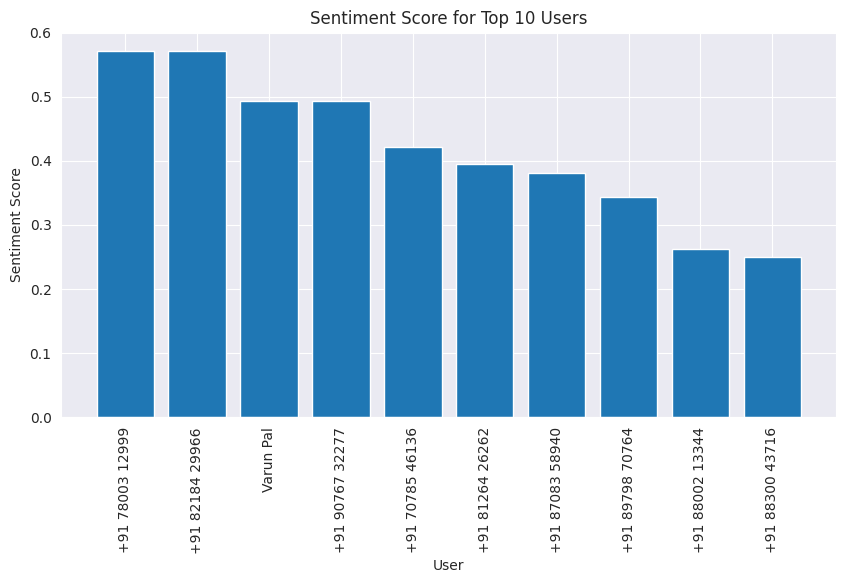

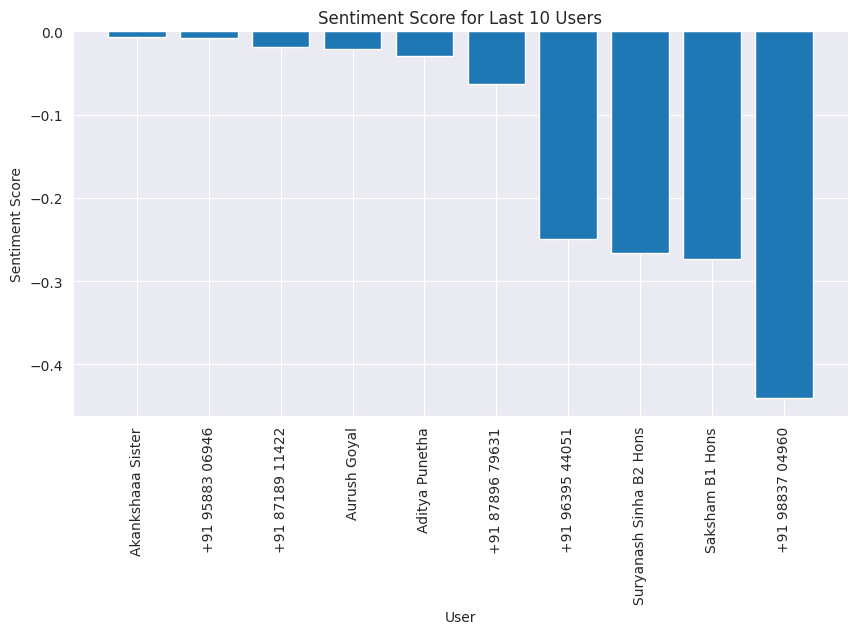

In [30]:
import matplotlib.pyplot as plt

# Plot sentiment score for top 10 users
plt.figure(figsize=(10, 5))
plt.bar(user_sentiment['user'].head(10), user_sentiment['compound_score'].head(10))
plt.title('Sentiment Score for Top 10 Users')
plt.xlabel('User')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Score')
plt.show()

# Plot sentiment score for last 10 users
plt.figure(figsize=(10, 5))
plt.bar(user_sentiment['user'].tail(10), user_sentiment['compound_score'].tail(10))
plt.title('Sentiment Score for Last 10 Users')
plt.xlabel('User')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Score')
plt.show()


In [13]:
from sklearn.cluster import KMeans

# Run KMeans clustering
num_clusters = 25
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(tfidf_matrix)

# Add cluster labels to dataframe
whatsapp_df['cluster'] = kmeans.labels_

# Group messages by cluster label
grouped_df = whatsapp_df.groupby('cluster')

import random

# Loop over clusters and print sample messages
for i in range(num_clusters):
    print(f'Cluster {i}:')
    messages = grouped_df.get_group(i)['message']
    message_indices = random.sample(range(len(messages)), min(30, len(messages)))
    for j in message_indices:
        print(f"\t{messages.iloc[j]}")
    print('\n')
# # Display representative messages from each cluster
# for i in range(num_clusters):
#     print(f'Cluster {i}:')
#     messages = grouped_df.get_group(i)['message'].unique()
#     selected_messages = np.random.choice(messages, size=min(len(messages), 10), replace=True)
#     for message in messages:
#         print(f'\t- {message}')
#     print('\n')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
	Kindly add your names here those were present in edge class today , it will be cross checked  Sanya Chhabra  Shruti Chamoli  Satwik Dubey Akanksha Shah Aditi Gupta Aditi Gupta Sarthak Kataria Aarushi Jain Aarti Alka Kaushik Sanidhya Jadaun Harsh Singhal Aditya Awasthi
	Kindly add your names here those were present in edge class today , it will be cross checked  Sanya Chhabra  Shruti Chamoli  Satwik Dubey Akanksha Shah Aditi Gupta Aditi Gupta
	Sanya Chhabra  Shruti Chamoli  Satwik Dubey Siddhartha Goyal Aakanksha Shah Aditi Gupta Aditi Gupta Sarthak Kataria Aarushi Jain Aarti Alka Kaushik Sanidhya Jadaun Harsh Singhal Aditya Awasthi Saksham Mathur Abhay Garg Sidhanth Bansal Siddhant Verma Siya Gupta Vanshika Vanya Maheshwari Aayushman Gusain Vanshita Mediratta Mohd Aman Sarthak Rathore  Sparsh patial  Suryansh sinha Aarnabh Beniwal Aman Singh Chauhan Agam Tyagi Yashasvi Singh Snigdha Parashar Saloni Sukirti Aditya aryan Tripti Gupta Varun pal Vinayak Sharma Shreya Shrivastav

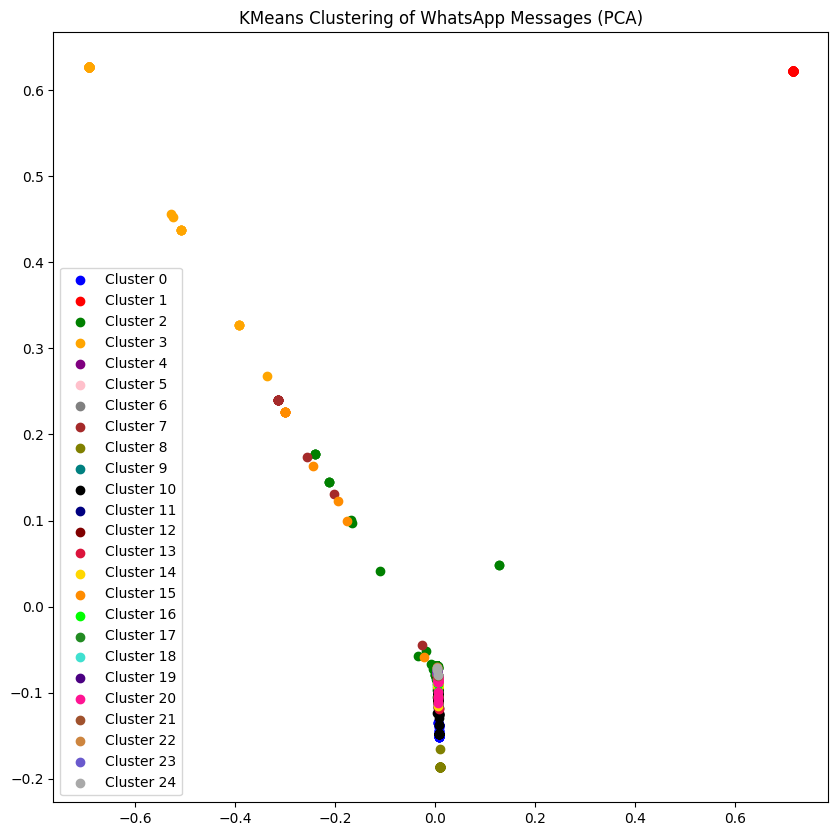

In [18]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on the TF-IDF matrix
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(tfidf_matrix.toarray())

# Add cluster labels to reduced matrix
reduced_df = pd.DataFrame(reduced_matrix, columns=['PC1', 'PC2'])
reduced_df['cluster'] = kmeans.labels_

# Plot the reduced data points with different colors for each cluster
fig, ax = plt.subplots(figsize=(10,10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'gray', 'brown', 'olive', 'teal',
          'black', 'navy', 'maroon', 'crimson', 'gold', 'darkorange', 'lime', 'forestgreen', 'turquoise',
          'indigo', 'deeppink', 'sienna', 'peru', 'slateblue', 'darkgray']

for i in range(num_clusters):
    cluster_df = reduced_df[reduced_df['cluster'] == i]
    ax.scatter(cluster_df['PC1'], cluster_df['PC2'], c=colors[i], label=f'Cluster {i}')

ax.legend()
plt.title('KMeans Clustering of WhatsApp Messages (PCA)')
plt.show()



In [19]:
# Group messages by cluster label and user name
user_cluster_counts = whatsapp_df.groupby(['cluster', 'user']).size().reset_index(name='count')

# Loop over clusters and print the users with the highest message counts
for i in range(num_clusters):
    print(f'Cluster {i}:')
    cluster_users = user_cluster_counts[user_cluster_counts['cluster'] == i]
    cluster_users = cluster_users.sort_values(by='count', ascending=False)
    for _, row in cluster_users.iterrows():
        print(f"\t{row['user']}: {row['count']} messages")
    print('\n')


Cluster 0:
	Someshgrng: 2 messages
	Sparsh Patial: 2 messages
	Abhishek Acharya: 2 messages
	Sanya Chhabra B1: 2 messages
	Sarthak Kataria: 2 messages
	Aman Chauhan: 2 messages
	Ananya Aditi Singh: 2 messages
	Trìptí✨ Gupta B2 Woodstock Haryana: 2 messages
	Vinayak 28 June: 2 messages
	Sudhanshu Vishvakarma: 1 messages
	Suryanash Sinha B2 Hons: 1 messages
	Sobuj Sarkar: 1 messages
	Sarthak Rathore: 1 messages
	Vanshita Mediratta: 1 messages
	Vanya Maheshwari: 1 messages
	Saloni Sukriti: 1 messages
	Saksham B1 Hons: 1 messages
	Aurush Goyal: 1 messages
	+91 74129 03349: 1 messages
	Akankshaaa Sister: 1 messages
	+91 76178 71641: 1 messages
	Aditya Punetha: 1 messages
	+91 78386 57242: 1 messages
	+91 79064 99489: 1 messages
	+91 80856 43273: 1 messages
	+91 87189 11422: 1 messages
	+91 87703 90197: 1 messages
	+91 87896 79631: 1 messages
	+91 88002 13344: 1 messages
	+91 88300 43716: 1 messages
	+91 95883 06946: 1 messages
	+91 98837 04960: 1 messages
	Aarnabh: 1 messages
	Aarushii: 1 m

In [20]:
img = whatsapp_df[whatsapp_df['message'] == "<Media omitted>" ]
img.shape

(86, 12)

In [21]:
whatsapp_df.drop(img.index, inplace=True)

In [22]:
whatsapp_df.reset_index(inplace=True, drop=True)
whatsapp_df.shape
num_rows = whatsapp_df.shape[0]
print(num_rows)

1490


In [23]:
totalNumberofMessage = whatsapp_df.message.count()
username   = whatsapp_df["user"].unique() #unique is a functions that able find the unique elements of an array

print('The total of the number of message:',totalNumberofMessage)
print('User name that involve in the chat:',username)

The total of the number of message: 1490
User name that involve in the chat: ['Sarthak Kataria' 'Aarushii' 'Tridha Bajaj' 'Saloni Sukriti' 'Aarti'
 'Someshgrng' '+91 93586 62942' 'Alka Kaushik' 'Aarnabh' 'Sanidhya Jadaou'
 'Trìptí✨ Gupta B2 Woodstock Haryana' 'Sobuj Sarkar' 'Vinayak 28 June'
 'Abhishek Acharya' 'Vanya Maheshwari' '+91 89798 70764' '~Vanshika 1 Jan'
 'Aurush Goyal' '+91 88661 80851' 'Ananya Aditi Singh'
 'Vanshita Mediratta' '+91 88002 13344' '+91 95883 06946' 'Arman Rabbani'
 '+91 81260 90416' 'Siddhant Verma' '+91 97177 25128' '+91 87703 90197'
 'Abhay Garg' 'Sparsh Patial' 'Aditya Punetha' '+91 80856 43273'
 'Sanya Chhabra B1' 'Arslaan B1' '+91 87189 11422' 'Aayushman Gussain'
 '+91 74129 03349' 'Shruti Chamoli' '+91 93094 51842'
 'Aditya Dhanraj Singh' '+91 73228 81929' '+91 81264 26262'
 'Sarthak Rathore' '+91 78386 57242' '+91 87083 58940' '+91 79822 91289'
 'Sudhanshu Vishvakarma' 'Aman Chauhan' '+91 70049 15008' 'Agam Tyagi'
 '+91 98358 84516' 'Saksham B1 Hons' 

In [24]:
#Creating a new dataframe by copying the old dataframe
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1['Number_of_messages'] = [1]* whatsapp_df1.shape[0]
whatsapp_df1.drop(columns = 'datetime', inplace = True)

#We are groupby the user and messages together then we will use count() to count the messages for each of user
whatsapp_df1 = whatsapp_df1.groupby('user')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
whatsapp_df1

,user,Number_of_messages
0,Tridha Bajaj,203
1,Aarti,147
2,Sanya Chhabra B1,105
3,Ananya Aditi Singh,75
4,Aurush Goyal,72
...,...,...
65,+91 96395 44051,1
66,+91 78003 12999,1
67,+91 70175 19959,1
68,+91 70785 46136,1


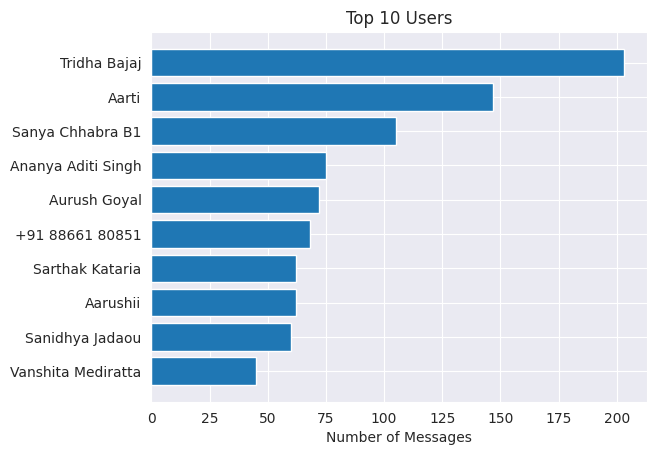

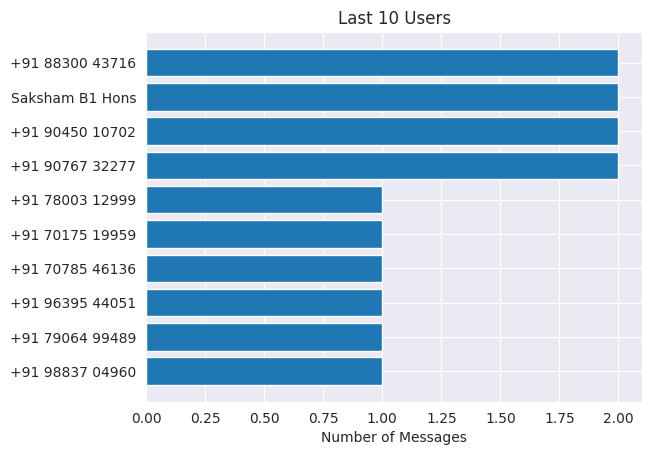

In [25]:
sns.set_style("darkgrid")
whatsapp_df1 = whatsapp_df1.sort_values(by='Number_of_messages')

# Plot the top 5 users
plt.barh(whatsapp_df1['user'][-10:], whatsapp_df1['Number_of_messages'][-10:])
plt.title('Top 10 Users')
plt.xlabel('Number of Messages')
plt.show()

# Plot the last 5 users
plt.barh(whatsapp_df1['user'][:10], whatsapp_df1['Number_of_messages'][:10])
plt.title('Last 10 Users')
plt.xlabel('Number of Messages')
plt.show()

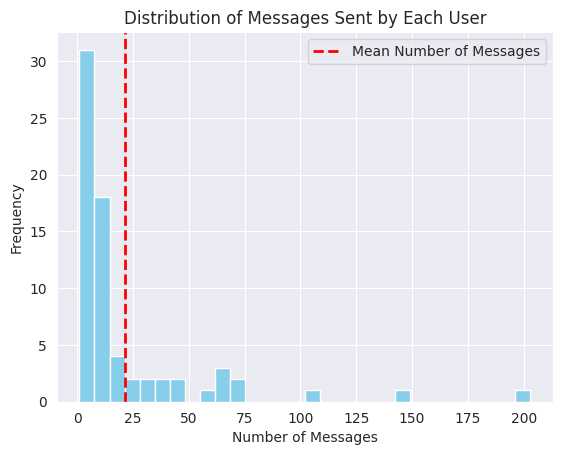

In [26]:
import matplotlib.pyplot as plt

# Increase the number of bins and change the color of bars
plt.hist(whatsapp_df1['Number_of_messages'], bins=30, color='skyblue')
plt.title('Distribution of Messages Sent by Each User')
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')

# Add a vertical line for the mean
mean = whatsapp_df1['Number_of_messages'].mean()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)

# Add a legend
plt.legend(['Mean Number of Messages'])

plt.show()

In [1]:
from emoji.core import emoji_count
import matplotlib.pyplot as plt


# Total number of emojis used
total_emojis = whatsapp_df['emojis'].apply(lambda x: sum(x.values())).sum()
print("Total number of emojis used:", total_emojis)

# Frequency of each used emoji
emojis_count = Counter()
for emoji_dict in whatsapp_df['emojis']:
    emojis_count += Counter(emoji_dict)
print("Frequency of each used emoji:")
for emoji, count in emojis_count.most_common():
    print(emoji, count)

emoji_freq = {emoji: count/total_emojis for emoji, count in emojis_count.items()}
df = pd.DataFrame({'emoji': list(emoji_freq.keys()), 'count': list(emoji_freq.values())})


#This pei chart give us and ideas the overall view of which emoji use the most
fig = px.pie(df, values='count', names='emoji', title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()




user_emoji_count = whatsapp_df.explode('emojis').groupby('user')['emojis'].count().sort_values(ascending=False)
# top_10_users = user_emoji_count.head(10).index.tolist()
top_10_users = whatsapp_df['user'].value_counts().nlargest(10).index

for user in top_10_users:
  
    user_df = whatsapp_df[whatsapp_df['user'] == user]
    emojis_list = list([a for b in user_df.emojis for a in b])
    emoji_dict = dict(Counter(emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    print('Emoji Distribution for', user)
    user_emoji_df = pd.DataFrame(emoji_dict, columns=['emojis', 'count'])
    fig = px.pie(user_emoji_df, values='count', names='emojis')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()





ModuleNotFoundError: ignored

In [ ]:
print(whatsapp_df.columns)


Index(['datetime', 'user', 'message', 'emojis'], dtype='object')


In [32]:
whatsapp_df4 = whatsapp_df.copy()
whatsapp_df4['Number_of_messages'] = [1] * whatsapp_df4.shape[0]

whatsapp_df4['month'] = whatsapp_df4['datetime'].apply(lambda x: x.month)  

df_month = whatsapp_df4.groupby('month')['Number_of_messages'].count().sort_values(ascending = False).reset_index()
df_month.head()

,month,Number_of_messages
0,3,743
1,2,375
2,1,341
3,12,31


Text(0.5, 1.0, 'Month that have the highest messages and the busiest month?')

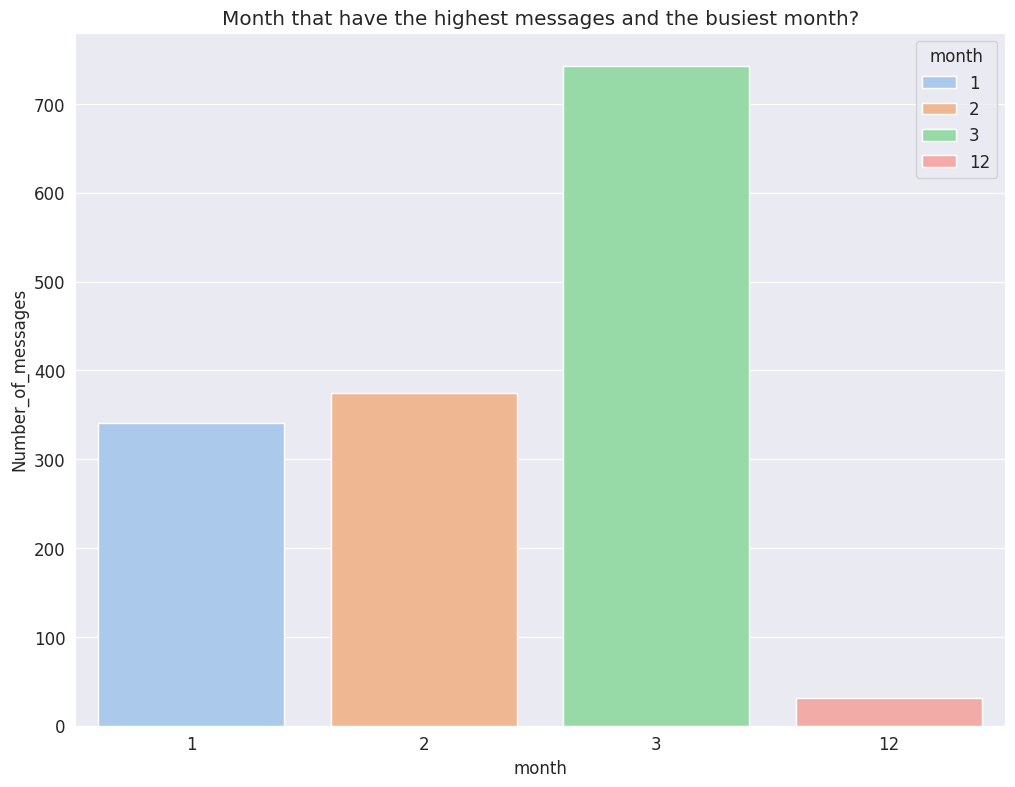

In [33]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(x=df_month.month,y=df_month.Number_of_messages ,hue='month',data=df_month,dodge=False,palette="pastel")
plt.title("Month that have the highest messages and the busiest month?")

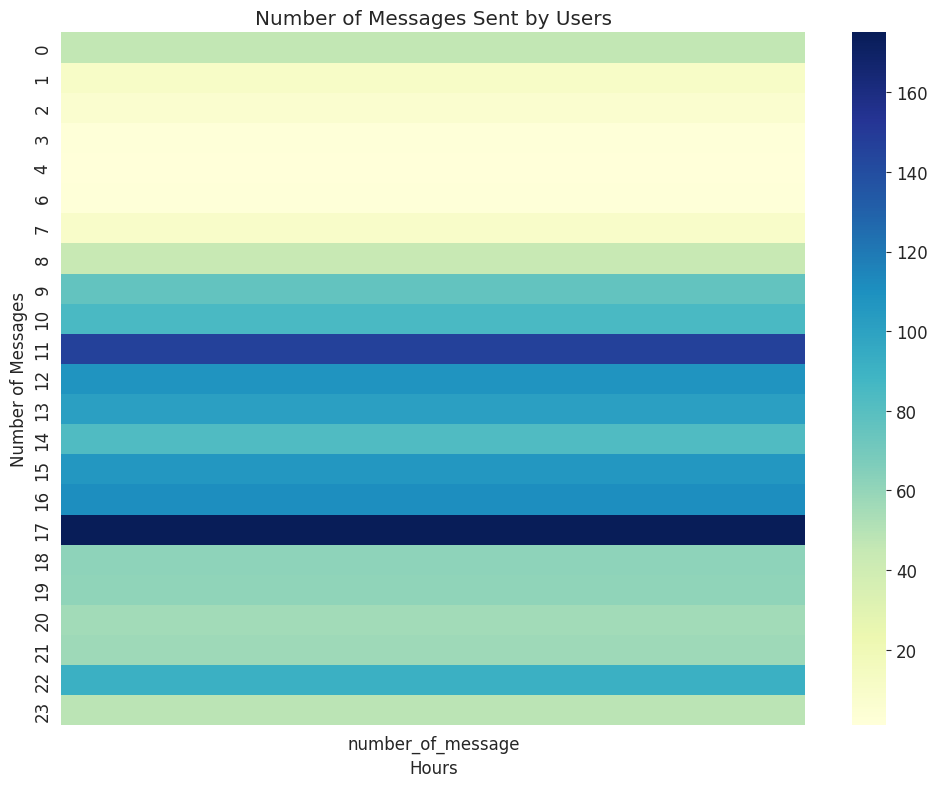

In [34]:
whatsapp_df3 = whatsapp_df.copy()

whatsapp_df3['number_of_message'] = [1] * whatsapp_df3.shape[0]

whatsapp_df3['hours'] = whatsapp_df3['datetime'].apply(lambda x: x.hour)

time_df = whatsapp_df3.groupby('hours').count().reset_index().sort_values(by = 'hours')



table = pd.pivot_table(whatsapp_df3, values='number_of_message', index=['hours'], aggfunc=len)

# Create the heatmap using seaborn's heatmap function
sns.heatmap(table, cmap="YlGnBu")

# Set the plot title and axis labels
plt.title("Number of Messages Sent by Users")
plt.xlabel("Hours")
plt.ylabel("Number of Messages")

# Show the plot
plt.show()

In [ ]:
whatsapp_df5 = whatsapp_df.copy()

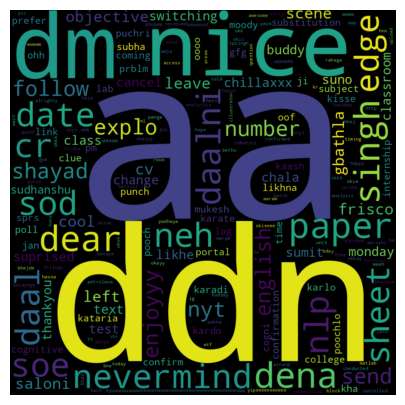

In [35]:
wordcloud = WordCloud(width=1000, height=1000, background_color='black', min_font_size=10).generate_from_frequencies(dict(top_words))

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

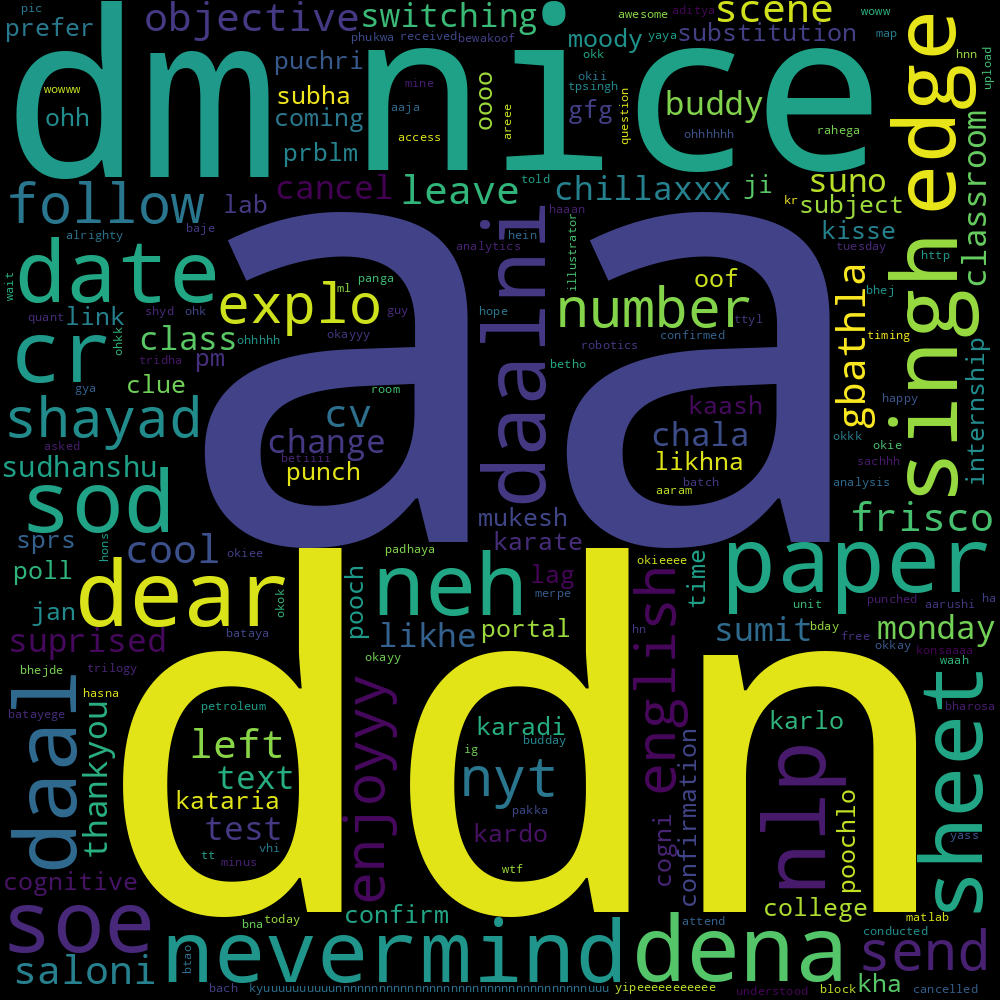

In [36]:
wordcloud.to_image()